In [ ]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
# Load MNIST DATASET
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
#Normalise the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Create the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 73s 38ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0291 - val_accuracy: 0.9921
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.0265 - val_accuracy: 0.9924
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0152 - accuracy: 0.9947 - val_loss: 0.0320 - val_accuracy: 0.9930
Epoch 4/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.0139 - accuracy: 0.9952 - val_loss: 0.0348 - val_accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0268 - val_accuracy: 0.9925
Epoch 6/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.0401 - val_accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.0298 -

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0328 - accuracy: 0.9935
Test accuracy: 0.9934999942779541


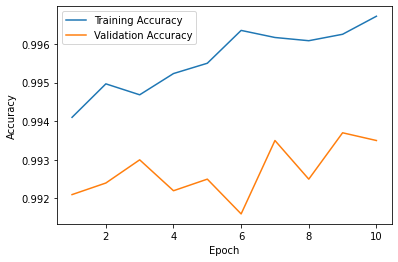

In [ ]:
# Plot Validation and training Accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = np.arange(1, 11)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()